# 1- Cargamos y consolidamos los datos

## 1.1 - Funciones

In [ ]:
from pathlib import Path
from bs4 import BeautifulSoup
import pickle
from pathlib import Path
from typing import List, Any

# ---------- 1. Leer truth.txt -------------------------------------------------
def parse_truth_file(truth_file_path: str) -> dict[str, dict[str, str]]:
    """Devuelve {file_code: {'gender': ..., 'country': ...}}"""
    info = {}
    with open(truth_file_path, "r", encoding="utf-8") as f:
        for line in f:
            parts = line.rstrip("\n").split(":::", 2)   # máximo 3 trozos
            if len(parts) == 3:
                code, gender, country = parts
                info[code] = {"gender": gender, "country": country}
    return info

# ---------- 2. Parsear un XML -------------------------------------------------
def parse_xml_file(xml_file_path: str) -> list[str]:
    """Extrae el texto de cada <document> en orden."""
    with open(xml_file_path, "r", encoding="utf-8") as f:
        soup = BeautifulSoup(f, "lxml-xml")   # parser XML rápido
    return [doc.get_text(strip=True) for doc in soup.find_all("document")]

# ---------- 3. Reunir todo ----------------------------------------------------
def gather_tweet_data(folder_path: str, truth_file_name: str = "truth.txt") -> list[dict]:
    """Combina truth.txt y los XML en una lista de dicts."""
    folder = Path(folder_path)
    truth = parse_truth_file(folder / truth_file_name)

    tweet_data = []
    for code, meta in truth.items():                     # mantiene el orden del truth
        xml_file = folder / f"{code}.xml"
        if xml_file.is_file():                          # evita fallo si falta el XML
            tweets = parse_xml_file(xml_file)
            tweet_data.append(
                {
                    "code": code,
                    "tweets": tweets,
                    "gender": meta["gender"],
                    "country": meta["country"],
                }
            )
    return tweet_data



def save_list_pickle(obj: List[Any], file_path: str | Path, *, protocol: int = pickle.HIGHEST_PROTOCOL) -> None:

    file_path = Path(file_path)
    with file_path.open("wb") as f:
        pickle.dump(obj, f, protocol=protocol)            # serializa y guarda :contentReference[oaicite:0]{index=0}


def load_list_pickle(file_path: str | Path) -> List[Any]:

    file_path = Path(file_path)
    with file_path.open("rb") as f:
        data = pickle.load(f)                              # deserializa de vuelta :contentReference[oaicite:1]{index=1}
    if not isinstance(data, list):
        raise TypeError(f"El objeto en {file_path} no es una lista.")
    return data


## 1.2 - Cargamos datos

In [ ]:
#Cargamos datos parseados
tweet_data_test = load_list_pickle("/content/drive/MyDrive/Centro Geo/Tweet_data_test.pkl")
tweet_data_train = load_list_pickle("/content/drive/MyDrive/Centro Geo/Tweet_data_train.pkl")

#Consolidamos datos
tweet_data = tweet_data_train + tweet_data_test


print(f'Keys: {list(tweet_data[0].keys())}\n')

n = 1000
print(f"codigo:  {tweet_data[n]['code']}")
print(f"genero:  {tweet_data[n]['gender']}")
print(f"pais:    {tweet_data[n]['country']}")
print(f"tweets:  {tweet_data[n]['tweets'][0:2]}\n")

print(f"no. de tweets por autor: {len(tweet_data[n]['tweets'])}")
print(f"no. de autores: {len(tweet_data)}\n\n")


Keys: ['code', 'tweets', 'gender', 'country']

codigo:  16a112db06509196118650abcf2f401b
genero:  male
pais:    argentina
tweets:  ['LOS COMPAÑEROS DE MI NOVIO LE QUIEREN ENTRAR A MI VIEJA KHE', 'Es mas divertido ser depresiva en verano porque nadie te obliga a salir de la cama xd']

no. de tweets por autor: 100
no. de autores: 7000




In [ ]:
tweet_data_preprocessed_2 = load_list_pickle("/content/drive/MyDrive/Centro Geo/Tweet_data_preprocessed_2.pkl")

In [ ]:
for i in range(50):
    print(f'{tweet_data[2]["tweets"][i]}')
    print(f'{tweet_data_preprocessed_2[2]["tweets"][i]}\n')

@EnriquePenalosa no sólo la infraestructura también la seguridad y la certeza de saber que nadie los va a robar!
infraestructura seguridad certeza robar

Extrañando mis montañas, nubes, sol, aire libre... // Missing my mountains, clouds, sun... #LiveOutdoor http://t.co/pLia6hXovc
extrañando montañas nubes sol aire libre missing my mountains clouds sun liveoutdoor

"En esta casa las emociones destructivas se quedan afuera... Y se entra con problemas que se tengan… https://t.co/EUr5adiTRp
casa emociones destructivas quedan afuera entra problemas tengan

Qué bonito es poder salir a ver ☁️ y ☀️ a la hora del almuerzo!
bonito salir <cloud> <sun> hora almuerzo

La gente anda diciendo ... 😶😐😏 https://t.co/xwkwamgDFF
gente anda diciendo <face_without_mouth> <neutral_face> <smirking_face>

Oficina paralizada con la etapa de hoy !!!!! #CiclismoColombiano https://t.co/q0xFpYXEgl
oficina paralizada etapa ciclismocolombiano

🎶Lléname de aire y del perfume de tu pelo ....
<musical_notes> lléname air

# 2 - EvoMSA

## 2.1 - Partición

### 2.1.1 - Funciones

In [ ]:
pip install EvoMSA

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.3/32.3 MB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 8.9 MB/s eta 0:00:00
  Created wheel for EvoMSA: filename=EvoMSA-2.0.12-cp311-cp311-linux_x86_64.whl size=32486397 sha256=ed29a78b7c1800ae897061f1552eea93ea8d765c003d02089f495033176a49e1
  Stored in directory: /root/.cache/pip/wheels/51/5a/62/150883af809ed87dcadc3bab1b585455d8691df98e999ece4f
Successfully built EvoMSA


In [ ]:
pip install CompStats

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.7 MB/s eta 0:00:00


In [ ]:
from EvoMSA import BoW, DenseBoW, StackGeneralization
from EvoMSA.tests.test_base import TWEETS
from microtc.utils import tweet_iterator
from IngeoML import SelectFromModelCV
from CompStats import CI, StatisticSamples
from CompStats import performance, difference, plot_difference
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn import metrics
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
from typing import Any
import re
import spacy
import unicodedata
from functools import lru_cache
import pickle
np.set_printoptions(precision=4)
sns.set_style('whitegrid')
import random
from typing import Union, List, Tuple




def split_tweet_data(
    tweet_data: List[dict],
    label_key: str,
    *,
    train_size: Union[int, float, None] = None,
    test_size: Union[int, float, None] = None,
    seed: int = 42
):
    """
    Divide tweet_data en conjuntos train/test sin reemplazo, permitiendo indicar
    explícitamente train_size o test_size (o ambos) como número de autores o fracción.

    Parámetros:
    - tweet_data: lista de dicts con keys 'tweets' (list[str]) y label_key:str
    - label_key: 'gender' o 'country'
    - train_size: si es int, número de autores en train; si es float en (0,1), fracción de autores; None para derivar.
    - test_size:  si es int, número de autores en test;  si es float en (0,1), fracción de autores; None para derivar.
    - seed: semilla aleatoria para reproducibilidad

    Retorna:
    - X_train: list[str]        todos los tweets del conjunto de train (aplanados)
    - y_train: list[str]        etiquetas correspondientes (repetidas por tweet)
    - X_test:  list[list[str]]  cada sublista = tweets de un autor en test
    - y_test:  list[str]        etiqueta por autor en test
    """
    N = len(tweet_data)
    if N == 0:
        return [], [], [], []

    # Determinar conteos de autores para train/test
    def to_count(x, total):
        if x is None:
            return None
        if isinstance(x, float):
            return int(total * x)
        return int(x)

    train_cnt = to_count(train_size, N)
    test_cnt  = to_count(test_size,  N)

    # Si uno está None, derivar del otro
    if train_cnt is None and test_cnt is None:
        # por defecto 80/20
        test_cnt  = int(0.2 * N)
        train_cnt = N - test_cnt
    elif train_cnt is None:
        train_cnt = N - test_cnt
    elif test_cnt is None:
        test_cnt = N - train_cnt

    # Asegurar no exceder
    train_cnt = max(0, min(train_cnt, N))
    test_cnt  = max(0, min(test_cnt,  N - train_cnt))

    # Barajar índices
    indices = list(range(N))
    random.seed(seed)
    random.shuffle(indices)

    # Cortar
    train_idx = indices[:train_cnt]
    test_idx  = indices[train_cnt:train_cnt + test_cnt]

    # Construir train aplastado
    X_train, y_train = [], []
    for i in train_idx:
        label = tweet_data[i][label_key]
        for tw in tweet_data[i]['tweets']:
            X_train.append(tw)
            y_train.append(label)

    # Construir test agrupado
    X_test, y_test = [], []
    for i in test_idx:
        X_test.append(list(tweet_data[i]['tweets']))  # copia de la lista
        y_test.append(tweet_data[i][label_key])

    return X_train, np.array(y_train), X_test, np.array(y_test)





def load_object_pickle(file_path: str | Path) -> Any:

    file_path = Path(file_path)
    with file_path.open("rb") as f:
        obj = pickle.load(f)
    return obj




import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)

def evaluate_binary_classification(y_true, y_pred, class_names=None, figsize=(8, 6)):
    """
    Calcula métricas de clasificación binaria y muestra una matriz de confusión.

    Parámetros:
    - y_true: array-like de etiquetas reales (tienen dos clases).
    - y_pred: array-like de etiquetas predichas.
    - class_names: lista de etiquetas en el orden [negativo, positivo].
                   Si es None, se inferirá de y_true ∪ y_pred.
    - figsize: tupla con el tamaño de la figura (ancho, alto) en pulgadas.
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Determinar etiquetas
    if class_names is None:
        labels = np.unique(np.concatenate((y_true, y_pred)))
        class_names = [str(l) for l in labels]
    else:
        labels = class_names

    # Métricas
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, pos_label=labels[1])
    recall = recall_score(y_true, y_pred, pos_label=labels[1])
    f1 = f1_score(y_true, y_pred, pos_label=labels[1])

    print(f"Accuracy       : {acc:.4f}")
    print(f"Precision      : {precision:.4f}")
    print(f"Recall         : {recall:.4f}")
    print(f"F1-score       : {f1:.4f}\n")

    # Matriz de confusión
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    fig, ax = plt.subplots(figsize=figsize)
    im = ax.imshow(cm, interpolation='nearest', aspect='auto')
    ax.set_title('Matriz de Confusión')
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    fig.colorbar(im, ax=ax)

    # Poner ticks y anotaciones
    ax.set_xticks(np.arange(len(class_names)))
    ax.set_yticks(np.arange(len(class_names)))
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, cm[i, j], ha='center', va='center')

    plt.tight_layout()
    plt.show()





import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

def evaluate_multiclass_classification(
    y_true,
    y_pred,
    labels=None,
    class_names=None,
    figsize=(8, 6),
    average='weighted'
):
    """
    Calcula métricas de clasificación multiclase y muestra la matriz de confusión.

    Parámetros
    ----------
    y_true : array-like
        Etiquetas verdaderas.
    y_pred : array-like
        Etiquetas predichas.
    labels : list, optional
        Valores de etiqueta a incluir (por ejemplo [0,1,2]). Si None, se infiere como
        la unión ordenada de valores en y_true y y_pred.
    class_names : list of str, optional
        Nombres de las clases en el mismo orden que `labels`. Si None,
        se usarán str(labels[i]).
    figsize : tuple, default=(8,6)
        Tamaño de la figura para la matriz de confusión.
    average : str, default='weighted'
        Tipo de promedio para las métricas: 'micro', 'macro', 'weighted', etc.
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Determinar labels
    if labels is None:
        labels = np.unique(np.concatenate((y_true, y_pred)))
    labels = list(labels)

    # Validar class_names
    if class_names is None:
        class_names = [str(l) for l in labels]
    elif len(class_names) != len(labels):
        raise ValueError("class_names debe tener la misma longitud que labels")

    # Métricas globales
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, labels=labels, average=average)
    rec = recall_score(y_true, y_pred, labels=labels, average=average)
    f1 = f1_score(y_true, y_pred, labels=labels, average=average)

    print(f"Accuracy ({average}) : {acc:.4f}")
    print(f"Precision ({average}): {prec:.4f}")
    print(f"Recall ({average})   : {rec:.4f}")
    print(f"F1-score ({average}) : {f1:.4f}\n")

    # Classification report detallado
    print("Classification Report:\n")
    print(classification_report(
        y_true,
        y_pred,
        labels=labels,
        target_names=class_names,
        digits=4
    ))

    # Matriz de confusión
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    fig, ax = plt.subplots(figsize=figsize)
    im = ax.imshow(cm, interpolation='nearest', aspect='auto')
    ax.set_title('Matriz de Confusión')
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    fig.colorbar(im, ax=ax)

    # Ticks y anotaciones
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(class_names, rotation=45, ha='right')
    ax.set_yticklabels(class_names)

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, cm[i, j], ha='center', va='center')

    plt.tight_layout()
    plt.show()

# Ejemplo de uso:
# evaluate_multiclass_classification(
#     y_true,
#     y_pred,
#     labels=[0,1,2],
#     class_names=['Clase A', 'Clase B', 'Clase C'],
#     figsize=(10, 8),
#     average='macro'
# )





### 2.1.2 - Particion (Train-Test)

In [ ]:
from sklearn.model_selection import train_test_split
import random


# 80% train, 20% test autores (por defecto)
X_gender_train, y_gender_train, X_gender_test, y_gender_test = split_tweet_data(tweet_data_preprocessed_2, 'gender',
                                                               train_size=0.20, test_size=0.05,
                                                               seed=112)

X_country_train, y_country_train, X_country_test, y_country_test = split_tweet_data(tweet_data_preprocessed_2, 'country',
                                                                   train_size=0.60, test_size=0.40,
                                                                   seed=124)




In [ ]:
len(X_gender_train)

140000

In [ ]:
len([tweet for tweet in X_gender_train if tweet == ''])

1167

## 2.2 - Procesamieno, Predicción y Evaluación

### 2.2.1 - Género

#### 2.2.1.1 - BoW

In [ ]:
from EvoMSA import BoW
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt



# Entrenamos la BoW y SVM---------------------------------------------------

bow_gender = BoW(lang              = 'es',
                 voc_size_exponent = 17,
                 pretrain          = False,
                 voc_selection     = "most_common_by_type").fit(X_gender_train, y_gender_train)



# Mapeo de clase---------------------------------------------------------
class_is_pos = {}
etiqueta = bow_gender.predict([X_gender_train[0]])[0]
score    = bow_gender.decision_function([X_gender_train[0]])[0].tolist()[0]
etiquetas = list(set(y_gender_train))
otra_etiqueta = [s for s in etiquetas if s != etiqueta][0]

if score > 0:
    class_is_pos[etiqueta] = True
    class_is_pos[otra_etiqueta] = False
else:
    class_is_pos[otra_etiqueta] = True
    class_is_pos[etiqueta] = False

pos_is_class =  {v: k for k, v in class_is_pos.items()}



#Prediccion --------------------------------------------------------------
predicted_labels_bow_gender = []
for x_list, true_label in zip(X_gender_test, y_gender_test):

    decision_functions_by_author = bow_gender.decision_function(x_list)
    decision_function_sum = sum(decision_functions_by_author).item()


    if decision_function_sum > 0:
        predicted_label = pos_is_class[True]
    else:
        predicted_label = pos_is_class[False]

    predicted_labels_bow_gender.append(predicted_label)






Accuracy       : 0.7443
Precision      : 0.7256
Recall         : 0.7799
F1-score       : 0.7517



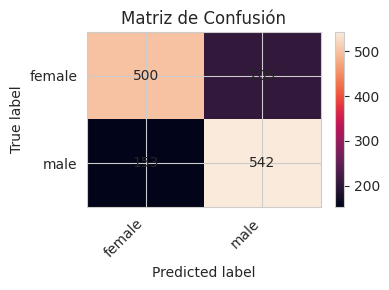

In [ ]:
evaluate_binary_classification(y_gender_test, predicted_labels_bow_gender, class_names=None, figsize=(4, 3))

##### Guardamos bow gender

In [ ]:
import os
import pickle
from pathlib import Path


ruta = "/content/drive/MyDrive/Centro Geo/bows and denses/bow_gender.pkl"
directorio = os.path.dirname(ruta)
if not os.path.exists(directorio):
    os.makedirs(directorio, exist_ok=True)

with open(ruta, "wb") as f:
    pickle.dump(bow_gender, f)

#--------------------------------------------------------------------------------

ruta = "/content/drive/MyDrive/Centro Geo/Predictions/bow_gender_predictions.pkl"
directorio = os.path.dirname(ruta)
if not os.path.exists(directorio):
    os.makedirs(directorio, exist_ok=True)

with open(ruta, "wb") as f:
    pickle.dump(predicted_labels_bow_gender, f)

##### Cargamos el bow gender guardado

In [ ]:
import os
import pickle
from pathlib import Path

ruta = "/content/drive/MyDrive/Centro Geo/bows and denses/bow_gender.pkl"

with open(ruta, "rb") as f:
    bow_gender = pickle.load(f)

#--------------------------------------------------------------------------------

ruta = "/content/drive/MyDrive/Centro Geo/Predictions/bow_gender_predictions.pkl"

with open(ruta, "rb") as f:
    predicted_labels_bow_gender = pickle.load(f)


#### 2.2.1.2 - Dense BoW

In [ ]:
from EvoMSA import DenseBoW
from sklearn.metrics import accuracy_score

# Entrenamiento ----------------------------------------------------------

# 3) Crea tu DenseBoW “vacío”
dense_gender = DenseBoW(
    lang="es",
    voc_size_exponent = 17,
    emoji=False,
    keyword=False,
    dataset=True,
    pretrain=True
).fit(X_gender_train, y_gender_train)


# Mapeo de clase---------------------------------------------------------

class_is_pos = {}
etiqueta = dense_gender.predict([X_gender_train[0]])[0]
score    = dense_gender.decision_function([X_gender_train[0]])[0].tolist()[0]
etiquetas = list(set(y_gender_train))
otra_etiqueta = [s for s in etiquetas if s != etiqueta][0]

if score > 0:
    class_is_pos[etiqueta] = True
    class_is_pos[otra_etiqueta] = False
else:
    class_is_pos[otra_etiqueta] = True
    class_is_pos[etiqueta] = False

pos_is_class =  {v: k for k, v in class_is_pos.items()}



#Prediccion --------------------------------------------------------------

predicted_labels_dense_gender = []
for x_list, true_label in zip(X_gender_test, y_gender_test):

    decision_functions_by_author = dense_gender.decision_function(x_list)
    decision_function_sum = sum(decision_functions_by_author).item()


    if decision_function_sum > 0:
        predicted_label = pos_is_class[True]
    else:
        predicted_label = pos_is_class[False]

    predicted_labels_dense_gender.append(predicted_label)





Accuracy       : 0.6143
Precision      : 0.5915
Recall         : 0.6269
F1-score       : 0.6087



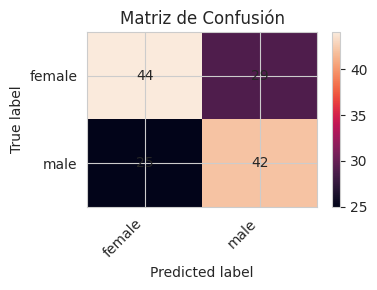

In [ ]:
evaluate_binary_classification(y_gender_test, predicted_labels_dense_gender, class_names=None, figsize=(4, 3))

In [ ]:
# 1) Coge ese objeto wrapper o BoW interno
rep = dense_gender.text_representations[0]

# 2) Extrae su SVM entrenada
svm_internal = rep.estimator_instance

# 3) Y su vocabulario
tokens_internal = rep.names    # o .bow.names si fuera un wrapper

# 4) Ahora sí arma tu DataFrame token × clase
import pandas as pd
df_token_weights = pd.DataFrame(
    svm_internal.coef_,      # shape (n_clases, n_features)
    index=svm_internal.classes_,
    columns=tokens_internal
)


AttributeError: 'BoWWrapper' object has no attribute 'estimator_instance'

##### Guardamos dense gender

In [ ]:
import os
import pickle
from pathlib import Path


ruta = "/content/drive/MyDrive/Centro Geo/bows and denses/dense_gender.pkl"
directorio = os.path.dirname(ruta)
if not os.path.exists(directorio):
    os.makedirs(directorio, exist_ok=True)

with open(ruta, "wb") as f:
    pickle.dump(dense_gender, f)

#--------------------------------------------------------------------------------

ruta = "/content/drive/MyDrive/Centro Geo/Predictions/dense_gender_predictions.pkl"
directorio = os.path.dirname(ruta)
if not os.path.exists(directorio):
    os.makedirs(directorio, exist_ok=True)

with open(ruta, "wb") as f:
    pickle.dump(predicted_labels_dense_gender, f)


##### Cargamos el dense gender guardado

In [ ]:
import os
import pickle
from pathlib import Path

ruta = "/content/drive/MyDrive/Centro Geo/bows and denses/dense_gender.pkl"

with open(ruta, "rb") as f:
    dense_gender = pickle.load(f)

#--------------------------------------------------------------------------------

ruta = "/content/drive/MyDrive/Centro Geo/Predictions/dense_gender_predictions.pkl"

with open(ruta, "rb") as f:
    predicted_labels_dense_gender = pickle.load(f)


### 2.2.2 - Nacionalidad

#### 2.2.2.1 - BoW

In [ ]:
class_to_id = {}

# Entrenamiento ----------------------------------------------------------------
bow_country = BoW(
                    lang               = 'es',
                    voc_size_exponent  = 17,
                    pretrain           = False,
                    voc_selection      = "most_common_by_type").fit(X_country_train, y_country_train)


# Mapeo de Clase --------------------------------------------------------------

for x, true_label in zip(X_country_train, y_country_train):
    # 1) predicción y scores con el mismo modelo
    etiqueta = bow_country.predict([x])[0]
    scores   = bow_country.decision_function([x])[0].tolist()  # unpack first row

    # 2) índice de la clase con score máximo
    idx_max  = scores.index(max(scores))

    # 3) registra mapping etiqueta → índice (solo la primera vez)
    if etiqueta not in class_to_id:
        class_to_id[etiqueta] = idx_max

        # 4) si ya vimos todas las etiquetas, podemos parar
        if len(class_to_id) == len(set(y_country_train)):
            break

id_to_class = {v: k for k, v in class_to_id.items()}


#  Predicción -------------------------------------------------------------------

predicted_labels_bow_country = []
for x_list, true_label in zip(X_country_test, y_country_test):

    decision_functions_by_author = bow_country.decision_function(x_list)
    decision_function_sum = sum(decision_functions_by_author).tolist()
    decision_function_sum_max = max(decision_function_sum)


    predicted_id = decision_function_sum.index(decision_function_sum_max)
    predicted_label = id_to_class[predicted_id]

    predicted_labels_bow_country.append(predicted_label)






Accuracy (weighted) : 0.9500
Precision (weighted): 0.9504
Recall (weighted)   : 0.9500
F1-score (weighted) : 0.9500

Classification Report:

              precision    recall  f1-score   support

   argentina     0.9548    0.9548    0.9548       221
       chile     0.9733    0.9579    0.9655       190
    colombia     0.9321    0.9626    0.9471       214
      mexico     0.9488    0.9623    0.9555       212
        peru     0.9565    0.9263    0.9412       190
       spain     0.9267    0.9620    0.9440       184
   venezuela     0.9613    0.9206    0.9405       189

    accuracy                         0.9500      1400
   macro avg     0.9505    0.9495    0.9498      1400
weighted avg     0.9504    0.9500    0.9500      1400



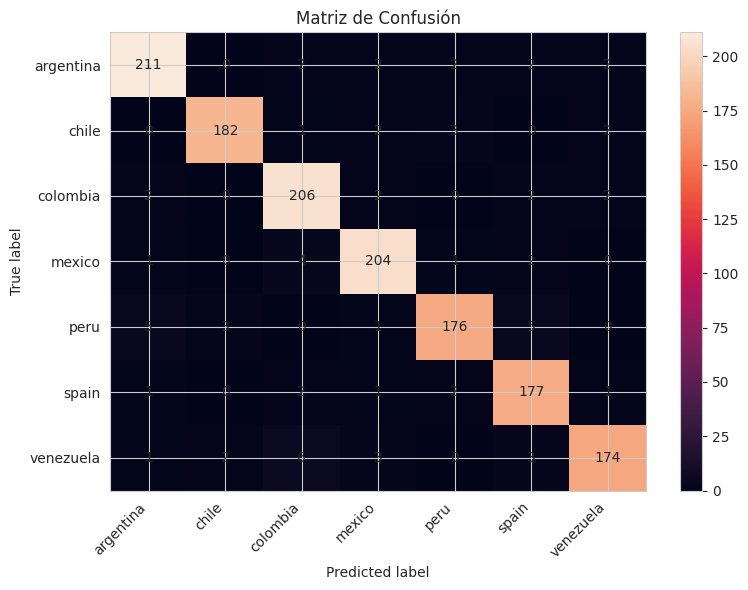

In [ ]:
evaluate_multiclass_classification(
    y_country_test,
    predicted_labels_bow_country,
    labels=None,
    class_names=None,
    figsize=(8, 6),
    average='weighted'
)


##### Guardamos bow country y predicciones

In [ ]:
import os
import pickle
from pathlib import Path


ruta = "/content/drive/MyDrive/Centro Geo/bows and denses/bow_country.pkl"
directorio = os.path.dirname(ruta)
if not os.path.exists(directorio):
    os.makedirs(directorio, exist_ok=True)

with open(ruta, "wb") as f:
    pickle.dump(bow_country, f)

#--------------------------------------------------------------------------------

ruta = "/content/drive/MyDrive/Centro Geo/Predictions/bow_country_predictions.pkl"
directorio = os.path.dirname(ruta)
if not os.path.exists(directorio):
    os.makedirs(directorio, exist_ok=True)

with open(ruta, "wb") as f:
    pickle.dump(predicted_labels_bow_country, f)



##### Cargamos el bow country guardado

In [ ]:
import os
import pickle
from pathlib import Path

ruta = "/content/drive/MyDrive/Centro Geo/bows and denses/bow_country.pkl"

with open(ruta, "rb") as f:
    bow_country = pickle.load(f)

#--------------------------------------------------------------------------------

ruta = "/content/drive/MyDrive/Centro Geo/Predictions/bow_country_predictions.pkl"

with open(ruta, "rb") as f:
    predicted_labels_bow_country = pickle.load(f)


#### 2.2.2.2 - Dense BoW

In [ ]:

# Entrenamiento ----------------------------------------------------------------
dense_country = DenseBoW(lang="es",
                        voc_size_exponent=17,
                        emoji=False,
                        keyword=True,
                        dataset=True,
                        pretrain=True).fit(X_country_train, y_country_train)

# Mapeo de Clase --------------------------------------------------------------

class_to_id = {}
for x, true_label in zip(X_country_train, y_country_train):
    # 1) predicción y scores con el mismo modelo
    etiqueta = dense_country.predict([x])[0]
    scores   = dense_country.decision_function([x])[0].tolist()  # unpack first row

    # 2) índice de la clase con score máximo
    idx_max  = scores.index(max(scores))

    # 3) registra mapping etiqueta → índice (solo la primera vez)
    if etiqueta not in class_to_id:
        class_to_id[etiqueta] = idx_max

        # 4) si ya vimos todas las etiquetas, podemos parar
        if len(class_to_id) == len(set(y_country_train)):
            break

id_to_class = {v: k for k, v in class_to_id.items()}


#  Predicción -------------------------------------------------------------------

predicted_labels_dense_country = []
for x_list, true_label in zip(X_country_test, y_country_test):

    decision_functions_by_author = dense_country.decision_function(x_list)
    decision_function_sum = sum(decision_functions_by_author).tolist()
    decision_function_sum_max = max(decision_function_sum)


    predicted_id = decision_function_sum.index(decision_function_sum_max)
    predicted_label = id_to_class[predicted_id]

    predicted_labels_dense_country.append(predicted_label)

Accuracy (weighted) : 0.9143
Precision (weighted): 0.9154
Recall (weighted)   : 0.9143
F1-score (weighted) : 0.9142

Classification Report:

              precision    recall  f1-score   support

   argentina     0.9229    0.9251    0.9240       414
       chile     0.9794    0.9453    0.9620       402
    colombia     0.8807    0.9389    0.9089       409
      mexico     0.9257    0.9034    0.9144       414
        peru     0.8992    0.8684    0.8835       380
       spain     0.8786    0.9660    0.9202       382
   venezuela     0.9189    0.8521    0.8843       399

    accuracy                         0.9143      2800
   macro avg     0.9151    0.9142    0.9139      2800
weighted avg     0.9154    0.9143    0.9142      2800



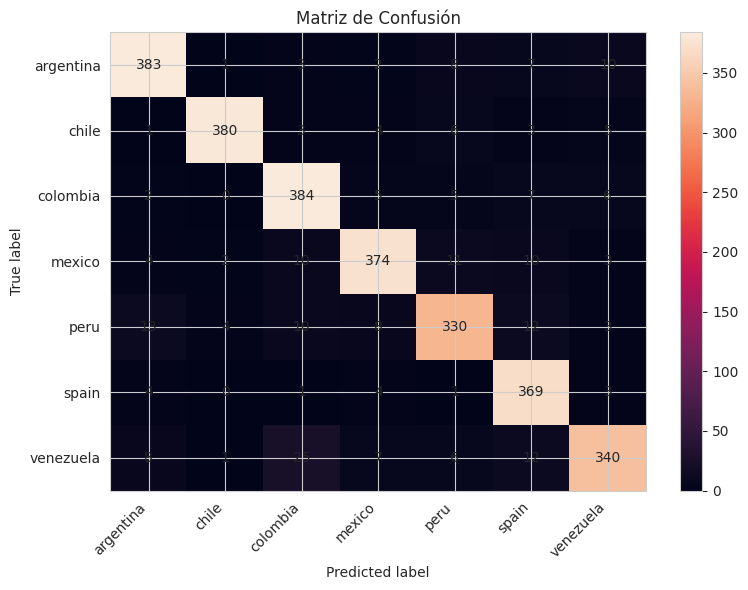

In [ ]:
evaluate_multiclass_classification(
    y_country_test,
    predicted_labels_dense_country,
    labels=None,
    class_names=None,
    figsize=(8, 6),
    average='weighted'
)


##### Guardamos dense country

In [ ]:
import os
import pickle
from pathlib import Path


ruta = "/content/drive/MyDrive/Centro Geo/bows and denses/dense_country.pkl"
directorio = os.path.dirname(ruta)
if not os.path.exists(directorio):
    os.makedirs(directorio, exist_ok=True)

with open(ruta, "wb") as f:
    pickle.dump(dense_country, f)

#--------------------------------------------------------------------------------

ruta = "/content/drive/MyDrive/Centro Geo/Predictions/dense_country_predictions.pkl"
directorio = os.path.dirname(ruta)
if not os.path.exists(directorio):
    os.makedirs(directorio, exist_ok=True)

with open(ruta, "wb") as f:
    pickle.dump(predicted_labels_dense_country, f)


##### Cargamos el dense country guardado

In [ ]:
import os
import pickle
from pathlib import Path

ruta = "/content/drive/MyDrive/Centro Geo/bows and denses/dense_country.pkl"

with open(ruta, "rb") as f:
    dense_country = pickle.load(f)

#--------------------------------------------------------------------------------

ruta = "/content/drive/MyDrive/Centro Geo/Predictions/dense_country_predictions.pkl"

with open(ruta, "rb") as f:
    predicted_labels_dense_country = pickle.load(f)


## 2.3.0 - Wordclouds con pesos de la svm

Cargamos la matriz de pesos de la svm de bow country

In [ ]:
import pandas as pd

# 1. Una vez entrenado tu BoW:
#    bow = BoW(...).fit(X_train, y_train)

# 2. Extrae la instancia de la SVM lineal
svm = bow_country.estimator_instance

# 3. Obtén la lista de tokens (la dimensión j)
tokens = bow_country.names
#    (heredado de BoWT; coincide con las columnas de coef_)

# 4. Obtén la lista de clases (la dimensión i)
classes = svm.classes_

# 5. Monta el DataFrame:
df_weights = pd.DataFrame(
    svm.coef_,      # shape (n_clases, n_features)
    index=classes,  # etiquetas de fila
    columns=tokens  # etiquetas de columna
)



In [ ]:
def top_tokens_per_class(df_weights, n=10):

    top_dict = {}
    for cls in df_weights.index:
        # row es una Series con índice=token y valor=peso
        row = df_weights.loc[cls]
        # nlargest devuelve las n entradas con mayor peso
        top_ser = row.nlargest(n)
        # convertir a lista de tuplas (token, peso)
        top_dict[cls] = list(zip(top_ser.index.tolist(), top_ser.values.tolist()))
    return top_dict




import matplotlib.pyplot as plt

def plot_class_boxplots(df_weights):
    """
    Para cada clase, dibuja un boxplot de la distribución de sus pesos
    (todas las columnas/features) en el DataFrame.

    Parámetros
    ----------
    df_weights : pandas.DataFrame
        Índice = clases, columnas = tokens, valores = pesos.
    """
    clases = df_weights.index.tolist()
    # Preparamos una lista de arrays: cada uno los pesos de una clase
    datos = [df_weights.loc[cls].values for cls in clases]

    plt.figure(figsize=(max(8, len(clases)*0.5), 6))
    plt.boxplot(datos, labels=clases, showfliers=False)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Distribución de pesos')
    plt.title('Boxplot de pesos por clase')
    plt.tight_layout()
    plt.show()


def plot_top_n_weights(df_weights, clase, n=10):
    """
    Grafica en barras los n tokens con mayor peso para la clase indicada.

    Parámetros
    ----------
    df_weights : pd.DataFrame
        DataFrame con índice=clases y columnas=tokens.
    clase : etiqueta de clase (debe estar en df_weights.index)
    n : int
        Cuántos tokens top mostrar.
    """
    serie = df_weights.loc[clase]
    topn  = serie.nlargest(n)

    plt.figure(figsize=(8, 5))
    topn.plot(kind='bar')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Token')
    plt.ylabel('Peso en la SVM')
    plt.title(f'Top {n} tokens por peso en la clase "{clase}"')
    plt.tight_layout()
    plt.show()


In [ ]:
# Supongamos que ya tienes:
# df_weights: DataFrame (clases × tokens) con los coeficientes de la SVM

topn = top_tokens_per_class(df_weights, n=100)



In [ ]:
topn['mexico']

[('q:mx~', 5.121929642757224),
 ('q:mx', 4.781634938068997),
 ('q:mex', 4.541963855889446),
 ('q:mex~', 3.596203034819826),
 ('neta', 3.321345059173444),
 ('q:~neta~', 3.321345059173444),
 ('q:tla', 3.2665928393578296),
 ('q:~neta', 3.232657229923808),
 ('eu', 2.683162364593657),
 ('q:~eu~', 2.683162364593657),
 ('q:pri~', 2.669322028107407),
 ('q:unam~', 2.657115049781084),
 ('q:epn', 2.6034867308662513),
 ('q:~ching', 2.564940451659619),
 ('q:ching', 2.506496025140316),
 ('hueva', 2.396889446227019),
 ('q:~tla', 2.3924180803994513),
 ('televisa', 2.3841903690356547),
 ('q:pinche', 2.336412752754135),
 ('q:prd~', 2.2468741122991056),
 ('q:boleto', 2.224794244812667),
 ('pri', 2.2148699773228384),
 ('q:~pri~', 2.2148699773228384),
 ('q:x~', 2.1966133086741437),
 ('q:hueva~', 2.1859629240746097),
 ('q:~rola', 2.1719721375438),
 ('q:~unam~', 2.1467553821252796),
 ('unam', 2.1467553821252796),
 ('q:epn~', 2.109876683283488),
 ('q:platic', 2.0957704911099637),
 ('excelente~semana', 2.07526

<ipython-input-18-7de71253651b>:33: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(datos, labels=clases, showfliers=False)


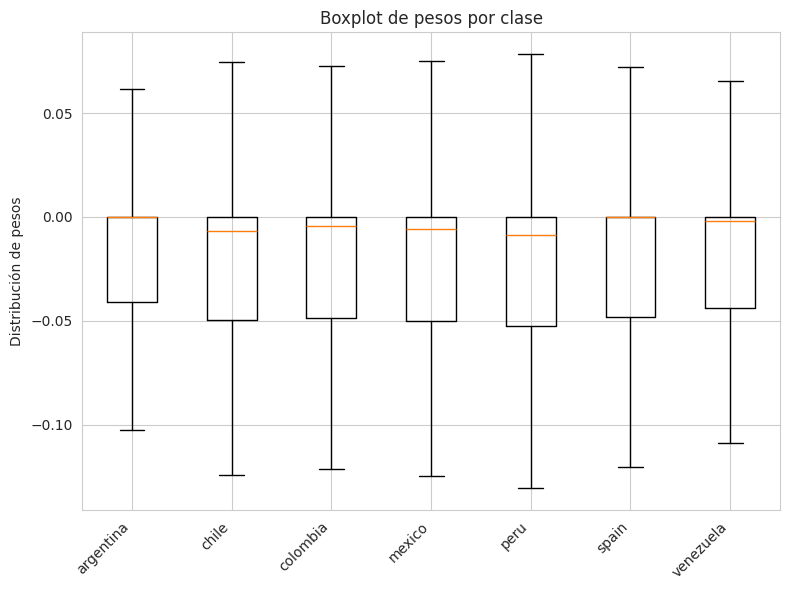

In [ ]:
# 1) Después de entrenar y generar df_weights:
plot_class_boxplots(df_weights)




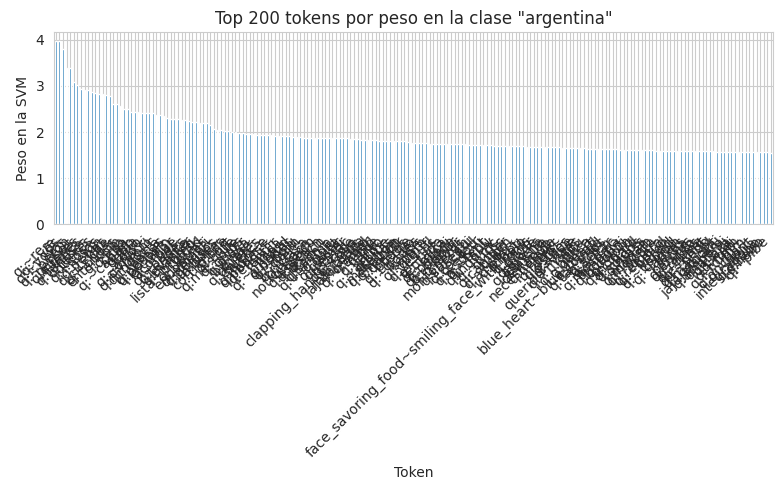

In [ ]:
# 2) Para ver, por ejemplo, los 15 tokens más importantes de la clase 'P':
plot_top_n_weights(df_weights, 'argentina', n=200)

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_svm_weight_wordcloud(
    df_weights,
    clase,
    max_words=200,
    use_abs=True,
    colormap='viridis',
    exclude_qgrams=False
):

    # 1) Extrae la serie de pesos para la clase
    series = df_weights.loc[clase]

    # 2) Construye el dict de frecuencias (coeficientes)
    if use_abs:
        freqs = {tok: abs(p) for tok, p in series.items() if p != 0}
    else:
        freqs = {tok: p for tok, p in series.items() if p > 0}

    # 3) Excluir q-gramas si se solicita
    if exclude_qgrams:
        freqs = {tok: val for tok, val in freqs.items() if not tok.startswith("q:")}

    # 4) Tomar top max_words
    top_items = dict(
        sorted(freqs.items(), key=lambda kv: kv[1], reverse=True)[:max_words]
    )

    # 5) Generar y mostrar el wordcloud
    wc = WordCloud(
        width=800, height=400, max_words=max_words, colormap=colormap
    ).generate_from_frequencies(top_items)

    plt.figure(figsize=(12, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    title = f'WordCloud pesos SVM – clase "{clase}"'
    if exclude_qgrams:
        title += ' (sin q-gramas)'
    plt.title(title)
    plt.show()



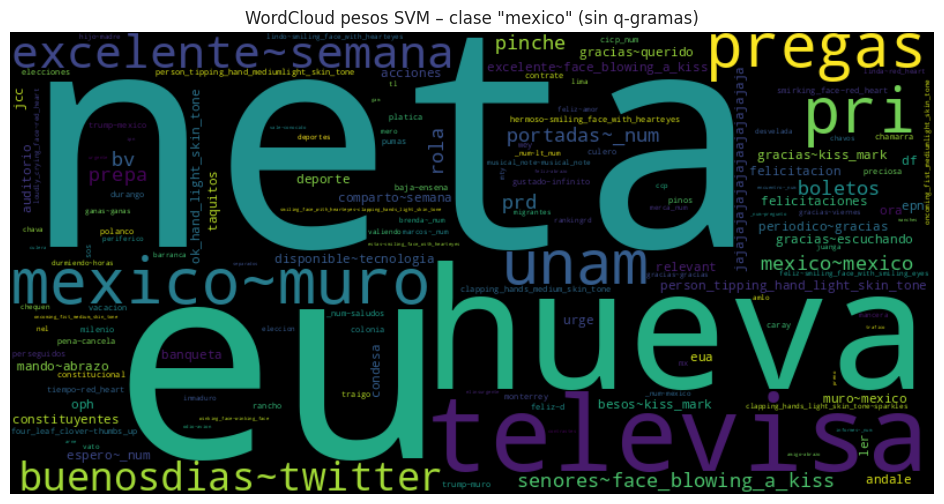

In [ ]:
# Wordcloud sin q-gramas para la clase 'P'
plot_svm_weight_wordcloud(df_weights, 'mexico', max_words=150, use_abs=True, exclude_qgrams=True)


## 2.3 - WordClouds

### 2.3.1 - Funciones

#### Funciones WordClouds TFIDF

In [ ]:
import matplotlib.pyplot as plt
from typing import Any, Dict, List, Union
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer
import math
from wordcloud import WordCloud
from matplotlib import pyplot as plt
import numpy as np
from collections import Counter
from typing import Dict, List, Set, Tuple



def plot_cosine_and_rate(pre, remove_values,
                         min_class_freq: int = 1,
                         exclude_tokens: set = frozenset(),
                         exclude_prefixes: tuple = ("q:",),
                         use_tfidf: bool = False):
    """
    Grafica la similitud coseno vs remove_global_top_n para cada clase
    y su tasa de cambio (derivada discreta).
    """
    tokens     = pre["tokens"]
    classes    = pre["classes"]
    global_vec = pre["global_tfidf"] if use_tfidf else pre["global_count"]
    class_vecs = pre["class_tfidfs"] if use_tfidf else pre["class_counts"]

    # 1) Máscaras de baseline
    baseline_masks = {}
    for c in classes:
        freqs = class_vecs[c]
        mask = freqs >= min_class_freq
        if exclude_tokens:
            mask &= ~np.isin(tokens, list(exclude_tokens))
        for pref in exclude_prefixes:
            mask &= ~np.char.startswith(tokens, pref)
        baseline_masks[c] = mask.astype(float)

    # 2) Cálculo de coseno
    class_cosines = {c: [] for c in classes}
    for rv in remove_values:
        if rv > 0:
            top_idx = np.argsort(-global_vec)[:rv]
            excl_mask = np.isin(tokens, tokens[top_idx])
        else:
            excl_mask = np.zeros_like(global_vec, dtype=bool)
        for c in classes:
            v_base = baseline_masks[c]
            v_filt = v_base.copy()
            v_filt[excl_mask] = 0
            if not v_filt.any():
                cos_val = 0.0
            else:
                cos_val = float(np.dot(v_base, v_filt) /
                                (np.linalg.norm(v_base) * np.linalg.norm(v_filt)))
            class_cosines[c].append(cos_val)

    # 3) Preparar derivadas discretas
    derivs = {}
    remove_vals = np.array(remove_values)
    deltas = np.diff(remove_vals)
    for c in classes:
        vals = np.array(class_cosines[c])
        # derivada: diff(vals)/diff(remove_values)
        derivs[c] = np.diff(vals) / deltas

    # 4) Graficar raw y rate
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True, tight_layout=True)

    for c in classes:
        ax1.plot(remove_values, class_cosines[c], marker='o', label=str(c))
        ax2.plot(remove_values[1:], derivs[c], marker='x', label=str(c))

    ax1.set_ylabel('Cosine similarity')
    ax1.set_title('Similitud Coseno vs remove_global_top_n')
    ax1.grid(True)
    ax1.legend(title='Clase', bbox_to_anchor=(1.05, 1), loc='upper left')

    ax2.set_xlabel('remove_global_top_n')
    ax2.set_ylabel('Tasa de cambio (Δcos/ΔN)')
    ax2.set_title('Derivada de Similitud Coseno')
    ax2.grid(True)
    ax2.legend(title='Clase', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()







import numpy as np
from typing import Any, List, Dict
from sklearn.feature_extraction.text import TfidfTransformer

# ────────────────────────────────────────────────────────────────
# 1) Utilidad privada para extraer el vocabulario de cualquier BoW
# ────────────────────────────────────────────────────────────────
def _extract_tokens(bow: Any) -> np.ndarray:
    """Devuelve np.array con el vocabulario del modelo `bow`, recursivo."""
    # 1) Si el objeto tiene .names  → tus propias clases
    if hasattr(bow, "names"):
        return np.array(bow.names)

    # 2) scikit‑learn (≥1.0 y <1.0)
    if hasattr(bow, "get_feature_names_out"):
        return bow.get_feature_names_out()
    if hasattr(bow, "get_feature_names"):
        return np.array(bow.get_feature_names())

    # 3) scikit‑learn genérico
    if hasattr(bow, "vocabulary_"):
        return np.array(sorted(bow.vocabulary_, key=bow.vocabulary_.get))

    # 4) gensim Dictionary o similares
    if hasattr(bow, "id2word"):
        return np.array([bow.id2word[i] for i in range(len(bow.id2word))])

    # 5) gensim 4 vía .dictionary o id2token
    if hasattr(bow, "dictionary"):
        dic = bow.dictionary
        try:
            return np.array([dic[i] for i in range(len(dic))])
        except Exception:
            pass
        if hasattr(dic, "id2token"):
            return np.array([dic.id2token[i] for i in range(len(dic.id2token))])

    if hasattr(bow, "id2token"):
        return np.array([bow.id2token[i] for i in range(len(bow.id2token))])

    # 6) **NUEVO**: wrappers que guardan el verdadero vectorizador en ._bow
    if hasattr(bow, "_bow"):
        return _extract_tokens(bow._bow)     # llamada recursiva

    # 7) No se encontró nada
    raise AttributeError(
        "No se pudo extraer el vocabulario: el objeto no tiene "
        "names, get_feature_names(_out), vocabulary_, id2word, "
        "dictionary, id2token ni _bow."
    )

# ────────────────────────────────────────────────────────────────
# 2) Función principal modificada
# ────────────────────────────────────────────────────────────────
def precompute_bow_features(
    bow_model: Any,               # instancia de BoW o DenseBoW
    X_train: List[Any],           # lista de textos (o dicts) para transformar
    y_train: List[Any],           # lista de etiquetas paralela a X_train
    compute_tfidf: bool = True    # si quieres además el bloque TF–IDF
) -> Dict[str, Any]:
    """
    Pre‑computa y resume en un dict:
      - tokens: vocabulario
      - classes: lista ordenada de clases
      - global_count: suma de conteos por token
      - global_tfidf: suma de TF–IDF por token (si compute_tfidf)
      - class_counts: dict clase -> vector de conteos
      - class_tfidfs: dict clase -> vector de TF–IDF (si compute_tfidf)

    Si le pasas un DenseBoW, extrae automáticamente su .bow interno.
    """
    # 0) Si es DenseBoW, desempacamos su BoW interno
    bow = bow_model.bow if hasattr(bow_model, "bow") else bow_model

    # 1) Vectorizar todo el corpus una sola vez
    DT_train = bow.transform(X_train)            # sparse (n_train, n_features)

    # 2) Sumar global de conteos
    global_count = DT_train.sum(axis=0).A1       # array 1‑D

    # 3) Calcular TF–IDF y sumar
    if compute_tfidf:
        tfidf = TfidfTransformer()
        DT_tfidf = tfidf.fit_transform(DT_train)
        global_tfidf = DT_tfidf.sum(axis=0).A1
    else:
        DT_tfidf = None
        global_tfidf = None

    # 4) Sumar por clase
    y_arr   = np.array(y_train)
    classes = sorted(set(y_arr))

    class_counts = {
        c: DT_train[y_arr == c].sum(axis=0).A1
        for c in classes
    }
    class_tfidfs = {
        c: DT_tfidf[y_arr == c].sum(axis=0).A1
        for c in classes
    } if compute_tfidf else None

    # 5) Extraer vocabulario con la utilidad robusta
    tokens = _extract_tokens(bow)

    # 6) Empaquetar resultados
    precomputed = {
        "tokens":       tokens,
        "classes":      classes,
        "global_count": global_count,
        "global_tfidf": global_tfidf,
        "class_counts": class_counts,
        "class_tfidfs": class_tfidfs,
    }

    return precomputed




def plot_class_wordclouds(pre, *,
                          use_tfidf:            bool   = False,
                          remove_global_top_n:  int    = 0,
                          min_class_freq:       int    = 1,
                          exclude_tokens:       set    = frozenset(),
                          exclude_prefixes:     tuple  = ("q:",),
                          cols:                 int    = 3):
    """
    pre: dict con 'tokens', 'classes', 'global_count', 'global_tfidf',
         'class_counts', 'class_tfidfs'
    Los demás args controlan los filtros antes de generar WordClouds.
    """
    tokens        = pre["tokens"]
    classes       = pre["classes"]
    global_vec    = pre["global_tfidf" if use_tfidf else "global_count"]
    class_vecs    = pre["class_tfidfs" if use_tfidf else "class_counts"]

    # 1) Identificar top‑N globales a excluir
    if remove_global_top_n > 0:
        top_idx     = np.argsort(-global_vec)[:remove_global_top_n]
        global_excl = set(tokens[top_idx])
    else:
        global_excl = set()

    # 2) Para cada clase, armar freq_dict filtrado
    clouds = {}
    for c in classes:
        vec = class_vecs[c]
        freq_dict = {}
        for tok, freq in zip(tokens, vec):
            if freq < min_class_freq:
                continue
            if tok in exclude_tokens or tok in global_excl:
                continue
            if any(tok.startswith(pref) for pref in exclude_prefixes):
                continue
            freq_dict[tok] = float(freq)
        clouds[c] = WordCloud(width=400, height=300) \
                       .generate_from_frequencies(freq_dict)

    # 3) Plot en grilla
    rows = math.ceil(len(classes) / cols)
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*4, rows*4),
                            tight_layout=True)
    axs = axs.flatten()
    for ax, c in zip(axs, classes):
        ax.imshow(clouds[c], interpolation='bilinear')
        ax.set_title(c)
        ax.axis("off")
    for ax in axs[len(classes):]:
        ax.axis("off")
    plt.show()





def count_top_tokens_per_class_fast(
    pre, remove_values, top_k=15,
    min_class_freq=1, exclude_tokens=frozenset(),
    exclude_prefixes=("q:",), use_tfidf=False
):
    tokens     = pre["tokens"]
    classes    = pre["classes"]
    global_vec = pre["global_tfidf"] if use_tfidf else pre["global_count"]
    class_vecs = pre["class_tfidfs"] if use_tfidf else pre["class_counts"]

    # 1) Pre‑ordenar tokens por frecuencia para cada clase
    sorted_idx = {
        c: np.argsort(-class_vecs[c])
        for c in classes
    }

    counters = {c: Counter() for c in classes}

    for rv in remove_values:
        # 2) cálculo de exclusión global
        excl_set = set(tokens[np.argsort(-global_vec)[:rv]]) if rv>0 else set()

        # 3) para cada clase, barrer su lista pre‑ordenada
        for c in classes:
            freq_vec = class_vecs[c]
            top_list = []
            for i in sorted_idx[c]:
                tok = tokens[i]
                f   = freq_vec[i]
                if f < min_class_freq:
                    break           # como está ordenado, ya no subirán
                if tok in excl_set:
                    continue
                if tok in exclude_tokens:
                    continue
                if any(tok.startswith(pref) for pref in exclude_prefixes):
                    continue
                top_list.append(tok)
                if len(top_list) >= top_k:
                    break
            counters[c].update(top_list)

    return counters



#### Funciones WordCloud SVM

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import math

def plot_all_svm_weight_wordclouds(
    df_weights,
    max_words=200,
    use_abs=True,
    colormap='viridis',
    exclude_qgrams=False,
    cols=3
):

    classes = df_weights.index.tolist()
    n_classes = len(classes)
    rows = math.ceil(n_classes / cols)

    fig, axs = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
    axs = axs.flatten()

    for ax, cls in zip(axs, classes):
        # 1) Obtiene la serie de pesos
        series = df_weights.loc[cls]

        # 2) Construye dict de frecuencias
        if use_abs:
            freqs = {tok: abs(p) for tok, p in series.items() if p != 0}
        else:
            freqs = {tok: p for tok, p in series.items() if p > 0}

        # 3) Excluir q-gramas si aplica
        if exclude_qgrams:
            freqs = {tok: val for tok, val in freqs.items() if not tok.startswith("q:")}

        # 4) Top tokens
        top_items = dict(
            sorted(freqs.items(), key=lambda kv: kv[1], reverse=True)[:max_words]
        )

        # 5) Genera wordcloud sobre el ax
        wc = WordCloud(
            width=400, height=300, max_words=max_words, colormap=colormap
        ).generate_from_frequencies(top_items)

        ax.imshow(wc, interpolation='bilinear')
        ax.set_title(f'{cls}', fontsize=12)
        ax.axis('off')

    # Desactiva ejes sobrantes
    for ax in axs[n_classes:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()


### 2.3.2 - Graficas

#### Genero

##### BoW

In [ ]:
precomputed_bow_gender = precompute_bow_features(
                          bow_gender,                 # tu instancia entrenada de BoW o DenseBoW
                          X_gender_train,             # lista de textos (o dicts) para transformar
                          y_gender_train,             # lista de etiquetas paralela a X_train
                          compute_tfidf = True        # si quieres además el bloque TF–IDF
                          )

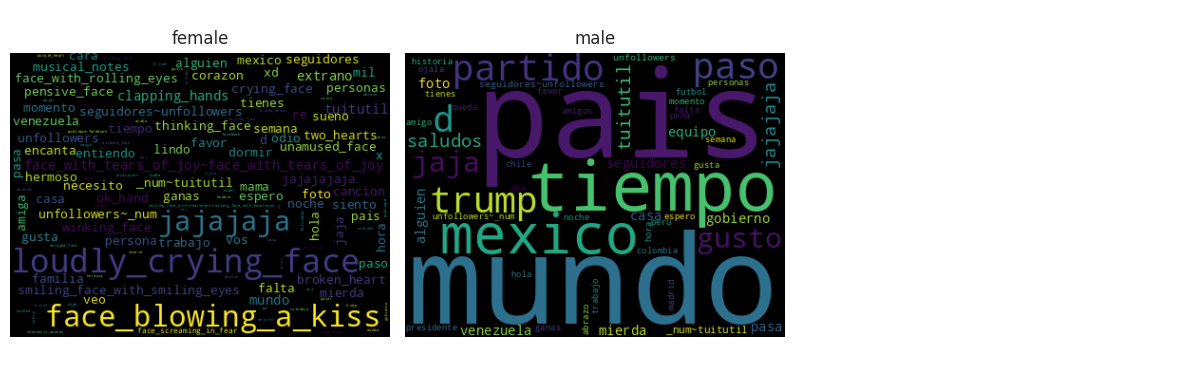

In [ ]:
# Ya ejecutaste el bloque 1) y tienes el dict `precomputed` en memoria.

# Ahora solo cambias los argumentos y vuelves a graficar:
plot_class_wordclouds(
    precomputed_bow_gender,
    use_tfidf           = True,
    remove_global_top_n = 2000,
    min_class_freq      = 5,
    exclude_tokens      = {},
    exclude_prefixes    = ("q:",),
    cols                = 3
)


In [ ]:
import pandas as pd
import numpy as np


svm_bow_gender = bow_gender.estimator_instance
tokens_bow_gender = bow_gender.names
classes_bow_gender = svm_bow_gender.classes_



# coef_[0] = w_pos; para la clase negativa w_neg = -w_pos
w_pos = svm_bow_gender.coef_[0]
w_neg = -w_pos
W_full = np.vstack([w_neg, w_pos])  # shape (2, n_features)

df_weights_bow_gender = pd.DataFrame(
    W_full,
    index=classes_bow_gender,    # ['neg_label', 'pos_label']
    columns=tokens_bow_gender
)



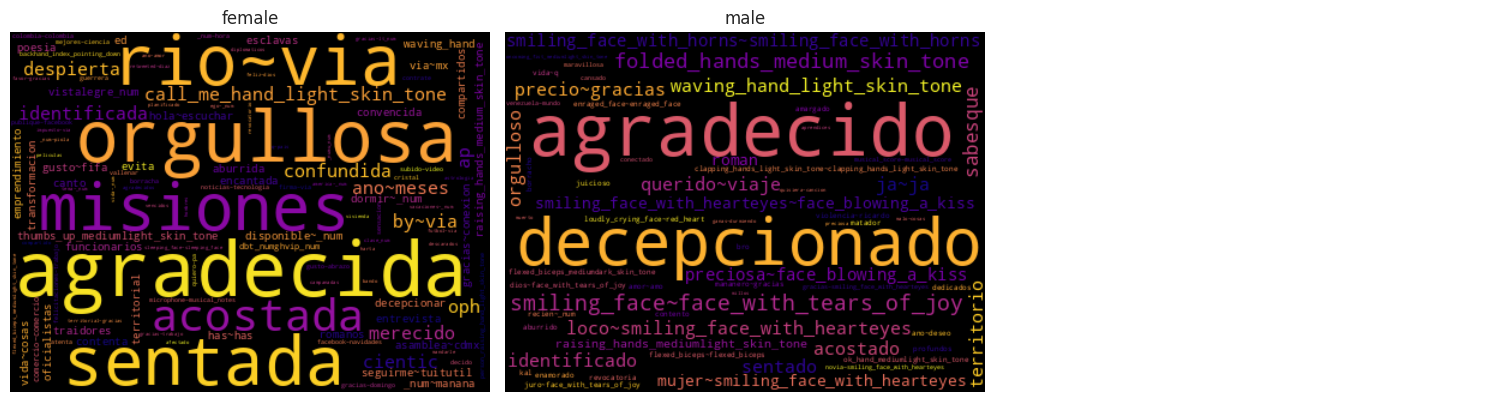

In [ ]:

plot_all_svm_weight_wordclouds(
    df_weights_bow_gender,
    max_words=150,
    use_abs=False,
    colormap='plasma',
    exclude_qgrams=True,
    cols=3
)


##### Dense BoW

In [ ]:
precomputed_dense_gender = precompute_bow_features(
                            dense_gender,                 # tu instancia entrenada de BoW o DenseBoW
                            X_gender_train,             # lista de textos (o dicts) para transformar
                            y_gender_train,             # lista de etiquetas paralela a X_train
                            compute_tfidf = True        # si quieres además el bloque TF–IDF
                            )

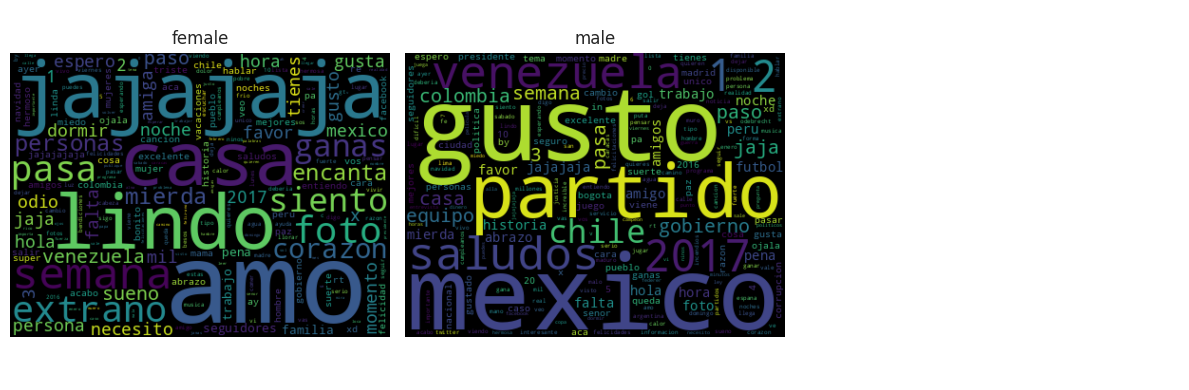

In [ ]:
# Ya ejecutaste el bloque 1) y tienes el dict `precomputed` en memoria.

# Ahora solo cambias los argumentos y vuelves a graficar:
plot_class_wordclouds(
    precomputed_dense_gender,
    use_tfidf           = True,
    remove_global_top_n = 2000,
    min_class_freq      = 5,
    exclude_tokens      = {},
    exclude_prefixes    = ("q:",),
    cols                = 3
)


In [ ]:
svm_perdida = dense_gender.estimator_instance  # (K,)


array([[0.8178]])

In [ ]:
import pandas as pd
import numpy as np


svm_dense_gender = dense_gender.estimator_instance
tokens_dense_gender = dense_gender.names
classes_dense_gender = svm_dense_gender.classes_



# coef_[0] = w_pos; para la clase negativa w_neg = -w_pos
w_pos = svm_dense_gender.coef_[0]
w_neg = -w_pos
W_full = np.vstack([w_neg, w_pos])  # shape (2, n_features)

df_weights_dense_gender = pd.DataFrame(
    W_full,
    index=classes_dense_gender,    # ['neg_label', 'pos_label']
    columns=tokens_dense_gender
)



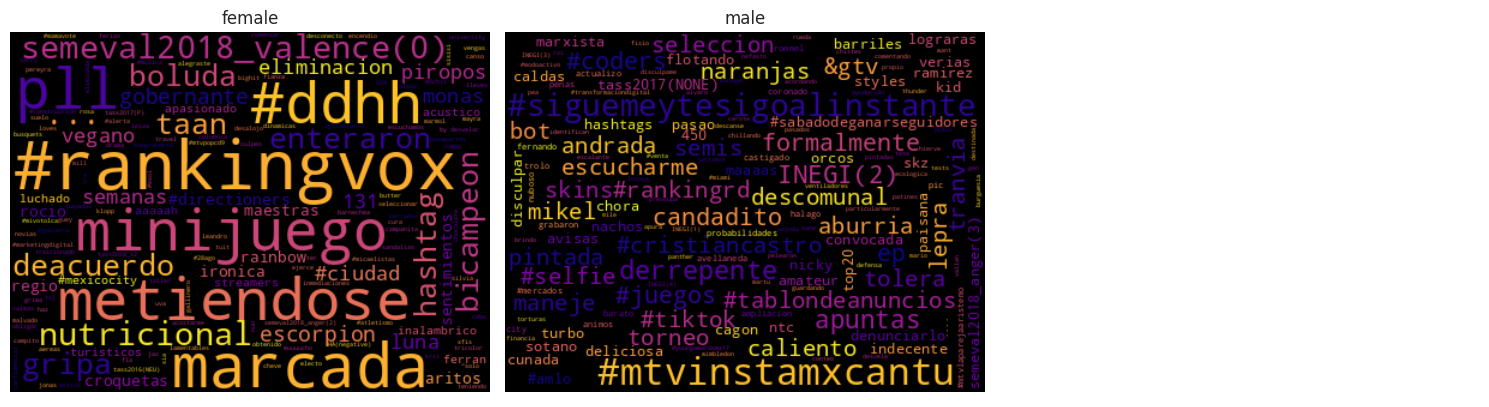

In [ ]:

plot_all_svm_weight_wordclouds(
    df_weights_dense_gender,
    max_words=150,
    use_abs=False,
    colormap='plasma',
    exclude_qgrams=True,
    cols=3
)


#### Nacionalidad

##### BoW

In [ ]:
precomputed_bow_country = precompute_bow_features(
                            bow_country,                 # tu instancia entrenada de BoW o DenseBoW
                            X_country_train,             # lista de textos (o dicts) para transformar
                            y_country_train,             # lista de etiquetas paralela a X_train
                            compute_tfidf = True        # si quieres además el bloque TF–IDF
                            )

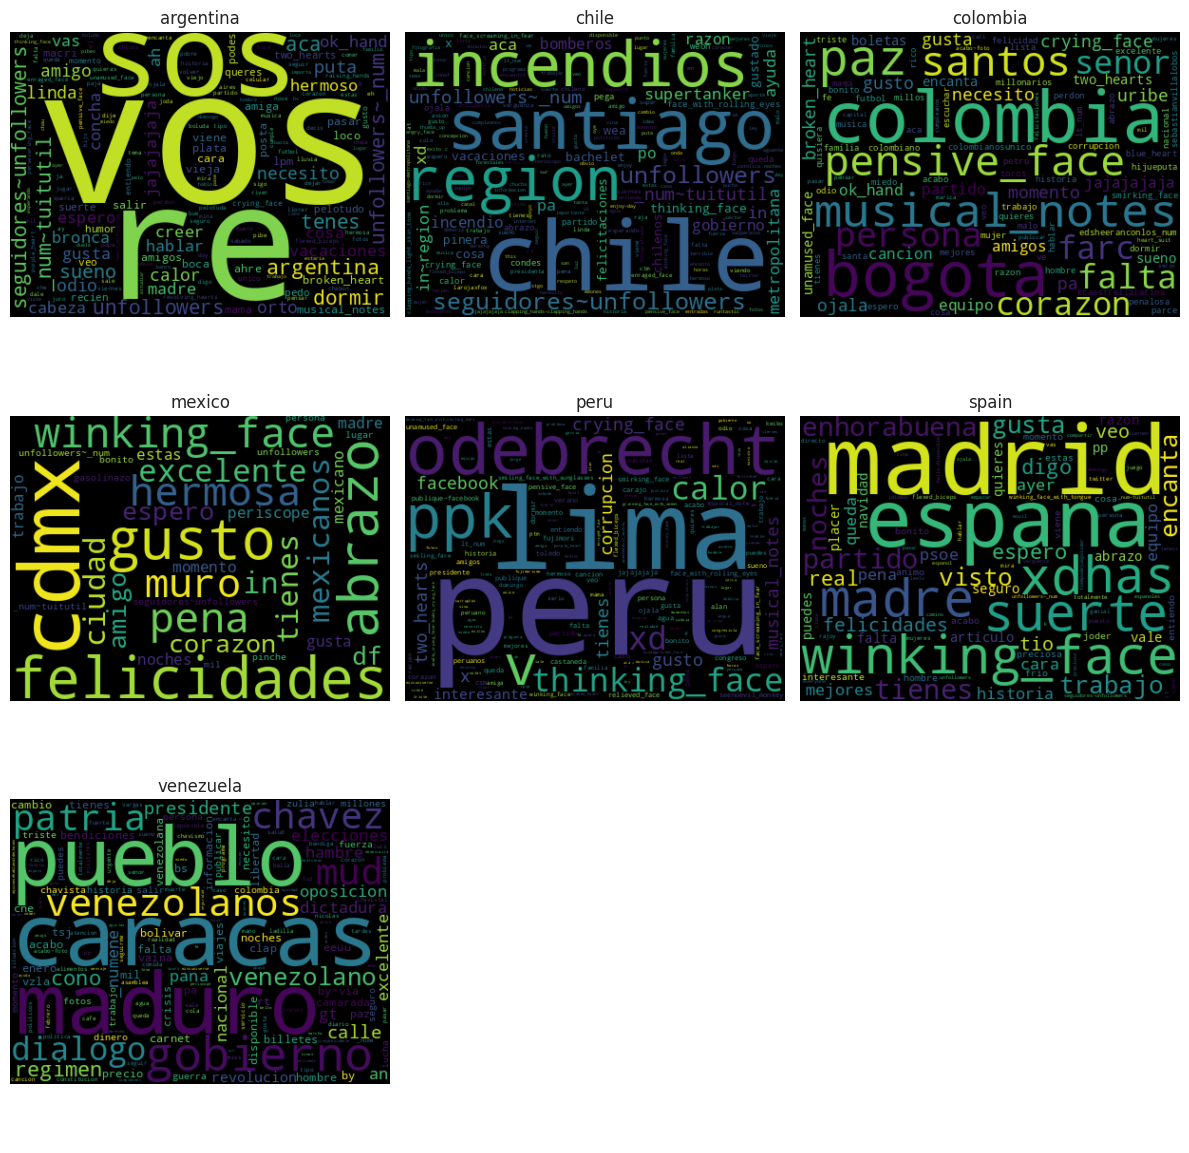

In [ ]:
# Ya ejecutaste el bloque 1) y tienes el dict `precomputed` en memoria.

# Ahora solo cambias los argumentos y vuelves a graficar:
plot_class_wordclouds(
    precomputed_bow_country,
    use_tfidf           = True,
    remove_global_top_n = 4000,
    min_class_freq      = 5,
    exclude_tokens      = {},
    exclude_prefixes    = ("q:",),
    cols                = 3
)


In [ ]:
import pandas as pd

svm_bow_country = bow_country.estimator_instance
tokens_bow_country = bow_country.names
classes_bow_country = svm_bow_country.classes_


df_weights_bow_country = pd.DataFrame(
    svm_bow_country.coef_,      # shape (n_clases, n_features)
    index=classes_bow_country,  # etiquetas de fila
    columns=tokens_bow_country  # etiquetas de columna
)


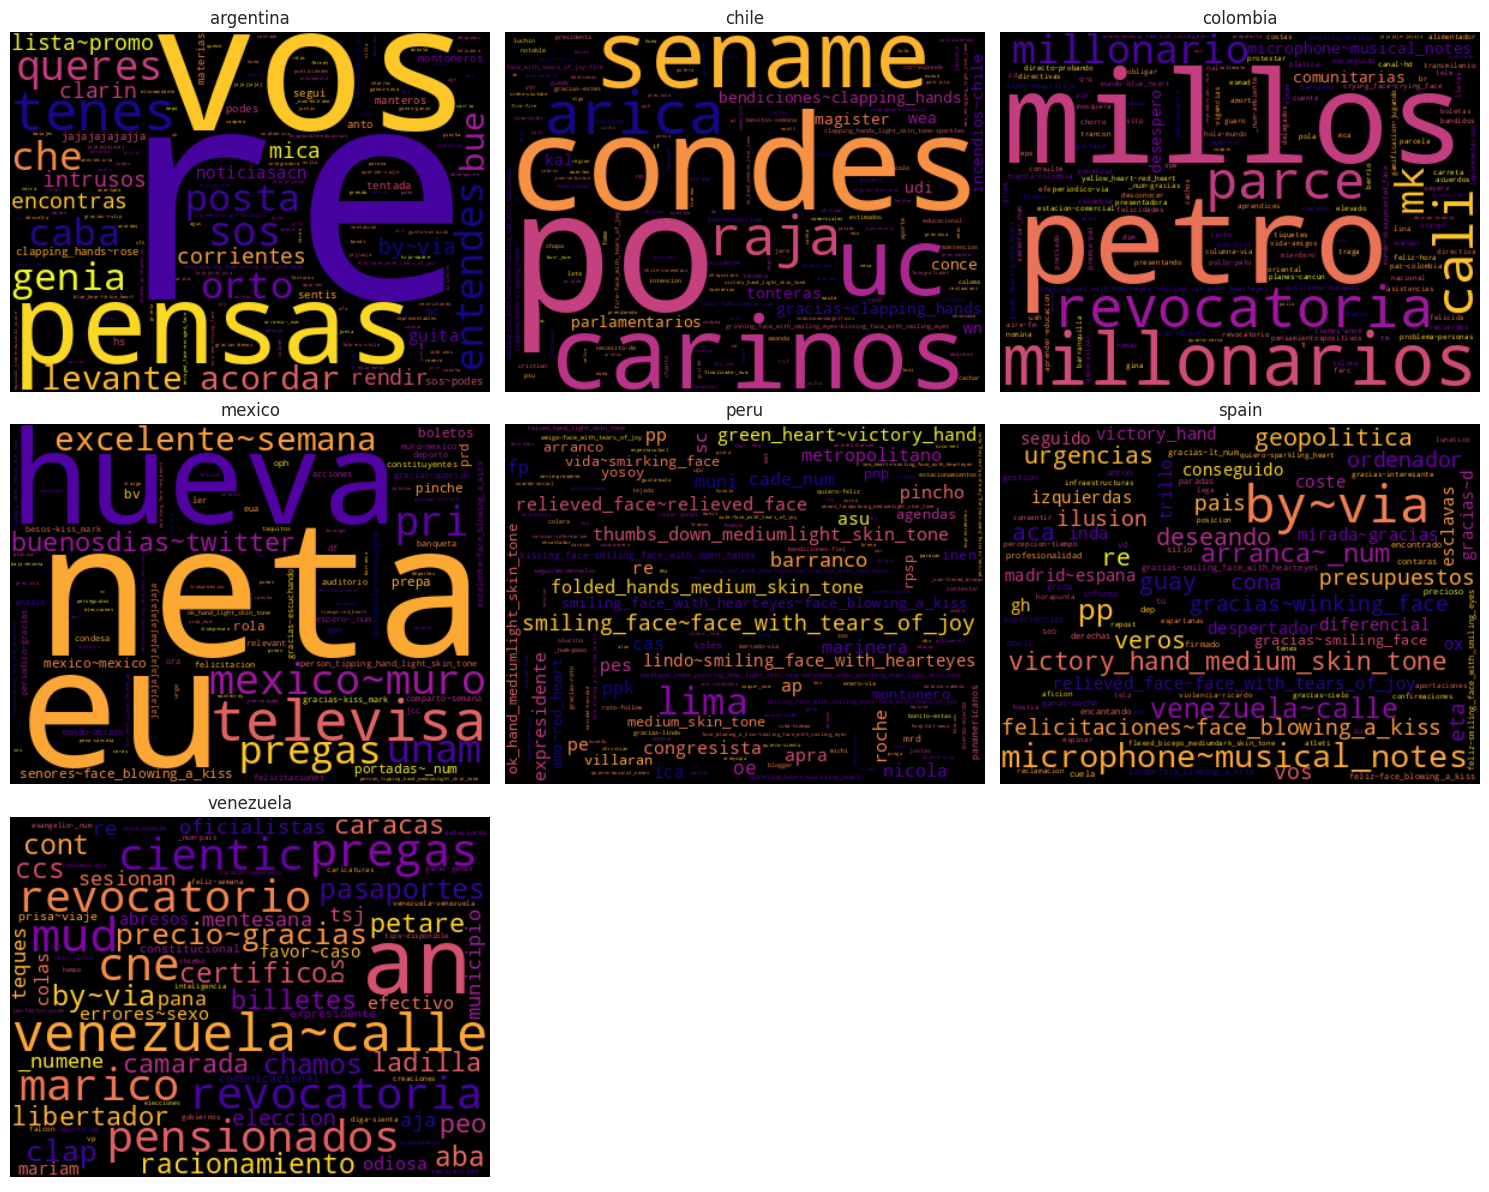

In [ ]:
plot_all_svm_weight_wordclouds(
    df_weights_bow_country,
    max_words=150,
    use_abs=True,
    colormap='plasma',
    exclude_qgrams=True,
    cols=3
)


##### Dense BoW

In [ ]:
precomputed_dense_country = precompute_bow_features(
                            dense_country,                 # tu instancia entrenada de BoW o DenseBoW
                            X_country_train,             # lista de textos (o dicts) para transformar
                            y_country_train,             # lista de etiquetas paralela a X_train
                            compute_tfidf = True        # si quieres además el bloque TF–IDF
                            )

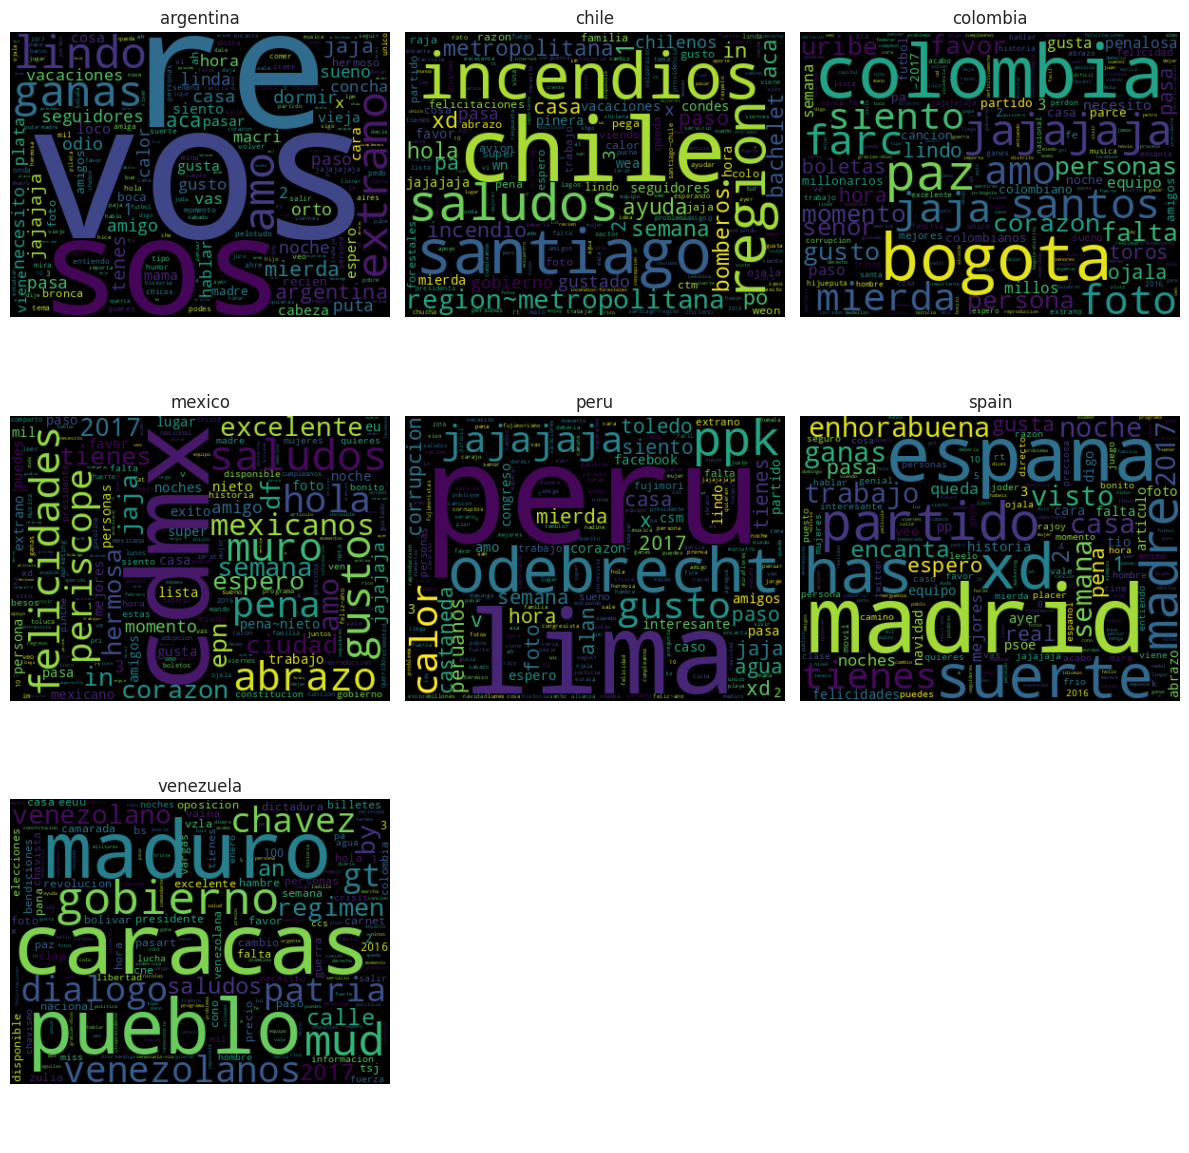

In [ ]:
# Ya ejecutaste el bloque 1) y tienes el dict `precomputed` en memoria.

# Ahora solo cambias los argumentos y vuelves a graficar:
plot_class_wordclouds(
    precomputed_dense_country,
    use_tfidf           = True,
    remove_global_top_n = 2000,
    min_class_freq      = 5,
    exclude_tokens      = {},
    exclude_prefixes    = ("q:",),
    cols                = 3
)


In [ ]:
import pandas as pd

svm_dense_country = dense_country.estimator_instance
tokens_dense_country = dense_country.names
classes_dense_country = svm_dense_country.classes_


df_weights_dense_country = pd.DataFrame(
    svm_dense_country.coef_,      # shape (n_clases, n_features)
    index=classes_dense_country,  # etiquetas de fila
    columns=tokens_dense_country  # etiquetas de columna
)



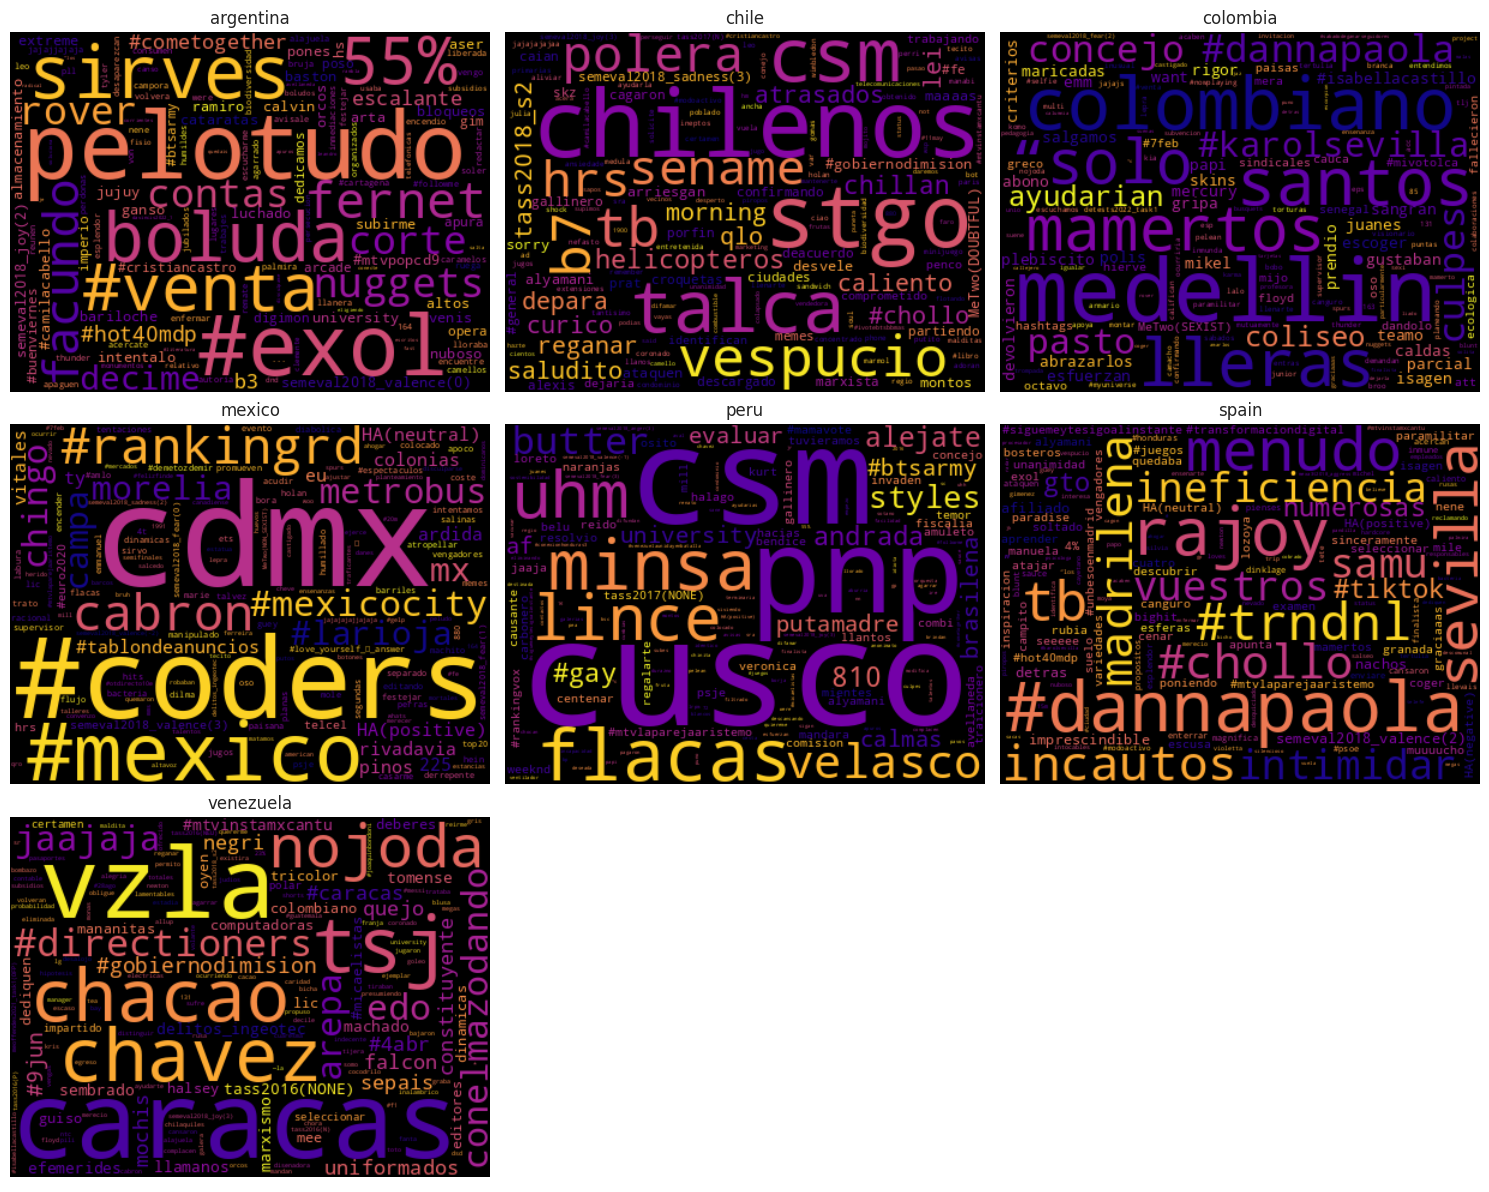

In [ ]:
plot_all_svm_weight_wordclouds(
    df_weights_dense_country,
    max_words=150,
    use_abs=False,
    colormap='plasma',
    exclude_qgrams=True,
    cols=3
)


## 2.4 Analisis de Sensibilidad y Comparacion

### funciones

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import numpy as np
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize

def generar_tdm(
    data,
    etiqueta,
    clases,
    tf_variant='raw',    # 'raw', 'bin', 'sublinear', 'augmented'
    use_idf=True,
    smooth_idf=True,
    norm=False,           # False, 'l1' o 'l2'
    ngram_range=(1,1),
    min_df=1,
    max_df=1.0
):
    """
    Genera matriz término-documento con TF-IDF o variantes de BoW:

    Parámetros
    ----------
    data : list of dict
        Cada dict debe tener 'tweets' (list[str]) y la clave `etiqueta`.
    etiqueta : str
        Nombre del campo para filtrar (p.ej. 'gender' o 'country').
    clases : list
        Lista de valores de etiqueta a incluir.
    tf_variant : str
        - 'raw'       → conteo crudo
        - 'bin'       → presencia/ausencia
        - 'sublinear' → 1 + log(tf) (si tf>0)
        - 'augmented' → 0.5 + 0.5·(tf / tf_max_doc)
    use_idf : bool
        Si True, multiplica por idf_j.
    smooth_idf : bool
        Sólo si use_idf=True. `idf_j = log((1+N)/(1+df_j)) + 1` si True,
        o `idf_j = log(N/df_j)` si False.
    norm : False or 'l1' or 'l2'
        Normalización por fila tras TF·IDF.
    ngram_range : tuple(int, int)
    min_df : int or float
    max_df : int or float

    Retorna
    -------
    X : csr_matrix, shape (n_docs, n_terms)
    features : np.ndarray of str
    labels : list
    """
    # 1) Filtrar y juntar todos los tweets como documentos
    docs, labels = [], []
    for item in data:
        val = item.get(etiqueta)
        if val in clases:
            for t in item.get('tweets', []):
                docs.append(t)
                labels.append(val)
    if not docs:
        raise ValueError("No hay documentos tras filtrar por etiqueta/clases")

    # 2) Conteos iniciales
    cv = CountVectorizer(
        binary=False,
        ngram_range=ngram_range,
        min_df=min_df,
        max_df=max_df
    )
    X_counts = cv.fit_transform(docs)  # sparse (n_docs, n_terms)
    feature_names = cv.get_feature_names_out()
    n_docs, n_terms = X_counts.shape

    # 3) Aplicar variante TF
    if tf_variant == 'raw':
        X_tf = X_counts.copy().astype(float)
    elif tf_variant == 'bin':
        X_tf = X_counts.copy()
        X_tf.data[:] = 1.0
    elif tf_variant == 'sublinear':
        X_tf = X_counts.copy().astype(float)
        X_tf.data = 1.0 + np.log(X_tf.data)
    elif tf_variant == 'augmented':
        # tf_max por documento
        row_max = X_counts.max(axis=1).toarray().ravel()
        X_tf = X_counts.copy().astype(float)
        # Para cada dato no-cero: 0.5 + 0.5*(tf / row_max[row])
        rows, cols = X_tf.nonzero()
        for i, j in zip(rows, cols):
            if row_max[i] > 0:
                X_tf[i, j] = 0.5 + 0.5 * (X_counts[i, j] / row_max[i])
            else:
                X_tf[i, j] = 0.0
    else:
        raise ValueError("tf_variant debe ser 'raw','bin','sublinear' o 'augmented'")

    # 4) Pesar por IDF (opcional)
    if use_idf:
        # df_j
        df = np.diff(X_counts.tocsc().indptr)
        if smooth_idf:
            idf = np.log((1 + n_docs) / (1 + df)) + 1.0
        else:
            idf = np.log(n_docs / df)
        X_tf = X_tf.multiply(idf)  # aplica idf por columna

    # 5) Normalización (opcional)
    if norm in ('l1', 'l2'):
        X_tf = normalize(X_tf, norm=norm, axis=1)

    return X_tf, feature_names, labels



---------------------------------------------------------------------------------
---------------------------------------------------------------------------------


def generar_bm25(
    data,
    etiqueta,
    clases,
    k1=1.5,
    b=0.75,
    ngram_range=(1,1),
    min_df=1,
    max_df=1.0
):
    """
    Genera matriz BM25:

    Parámetros
    ----------
    data, etiqueta, clases : igual que en generar_tdm
    k1 : float
        Parámetro de saturación de TF.
    b : float
        Parámetro de normalización por longitud (0=no, 1=total).
    ngram_range, min_df, max_df : igual que en generar_tdm

    Retorna
    -------
    X_bm25 : csr_matrix, shape (n_docs, n_terms)
    features : np.ndarray of str
    labels : list
    """
    # Filtrar docs
    docs, labels = [], []
    for item in data:
        val = item.get(etiqueta)
        if val in clases:
            for t in item.get('tweets', []):
                docs.append(t)
                labels.append(val)
    if not docs:
        raise ValueError("No hay documentos tras filtrar por etiqueta/clases")

    # Conteos
    cv = CountVectorizer(
        binary=False,
        ngram_range=ngram_range,
        min_df=min_df,
        max_df=max_df
    )
    X = cv.fit_transform(docs).astype(float)  # (n_docs, n_terms)
    feature_names = cv.get_feature_names_out()
    n_docs, n_terms = X.shape

    # df y idf BM25
    df = np.diff(X.tocsc().indptr)
    idf = np.log((n_docs - df + 0.5) / (df + 0.5) + 1.0)

    # longitudes de documento
    dl = X.sum(axis=1).A1
    avg_dl = dl.mean()

    # BM25
    # denominador: tf + k1*(1 - b + b*(dl/avg_dl))
    denom = X.copy()
    factor = k1 * (1 - b + b * (dl[:, None] / avg_dl))
    # sum tf_ij + factor_i
    denom.data = X.data + np.repeat(factor.ravel(), np.diff(X.indptr))
    num = X.multiply(k1 + 1.0)
    X_bm25 = num.multiply(1.0 / denom)
    # aplicar idf
    X_bm25 = X_bm25.multiply(idf)

    return csr_matrix(X_bm25), feature_names, labels



---------------------------------------------------------------------------------
---------------------------------------------------------------------------------



from sklearn.model_selection import StratifiedKFold

def crear_stratified_folds(data, etiqueta, n_folds=5, random_state=None):
    """
    Divide `data` (lista de dicts) en n_folds folds estratificados sobre `etiqueta`.

    Parámetros
    ----------
    data : list of dict
        Lista de diccionarios que contienen al menos la key `etiqueta`.
    etiqueta : str
        Nombre del campo con la clase para estratificar (p.ej. 'gender' o 'country').
    n_folds : int, default=5
        Número de folds a generar.
    random_state : int o None, default=None
        Semilla para barajar antes de hacer el split (reproducibilidad).

    Retorna
    -------
    folds : list of tuples
        Lista de largo `n_folds`, donde cada elemento es un tuple
        (train_subset, test_subset), y cada uno es lista de dicts.
        - train_subset: ~80% de `data`
        - test_subset:  ~20% de `data`, y los test de distintos folds son disjuntos.
    """
    # Extraer etiquetas
    y = [item[etiqueta] for item in data]

    # Stratified K-Fold
    skf = StratifiedKFold(
        n_splits=n_folds,
        shuffle=True,
        random_state=random_state
    )

    folds = []
    for train_idx, test_idx in skf.split(data, y):
        train = [data[i] for i in train_idx]
        test  = [data[i] for i in test_idx]
        folds.append((train, test))

    return folds



SyntaxError: invalid syntax (<ipython-input-1-06fc24a9708e>, line 116)

### Analisis de sensibilidad

In [ ]:
print(f'keys: {list(tweet_data_preprocessed_2[0].keys())}')
print(f'key tweets: {tweet_data_preprocessed_2[0]["tweets"]}')
print(f'key tweets: {list(set([tweet_data_preprocessed_2[i]["gender"] for i in range(len(tweet_data_preprocessed_2)) ] ))}')
print(f'key tweets: {list(set([tweet_data_preprocessed_2[i]["country"] for i in range(len(tweet_data_preprocessed_2)) ] ))}')

keys: ['code', 'tweets', 'gender', 'country']
key tweets: ['valer pena esté despierta hora hoylosgrammycon40', 'tintas chinas ven ésto buscándolas partes aparezcan mañana plásticas xoxo', 'maestro abrió ay yuri yanet', 'enamorado fastidia 532197 tweets depresivos corta venas ecriben', 'recordaré duró 2568 semanas', 'vuelvas quedes', 'resulta punto luna venus tomé foto tragedia', 'planeta forma punto vista terrestre', 'salen tl ganan edsheeranconlos40', 'deberían regalarme boleta creatividad esciger azar edsheeranconlos40', 'vas regalar llevo escribiendoles edsheeranconlos40', 'primeras canciones conocí edsheeranconlos40', 'conocí lego house edsheeranconlos40', 'admiración edsheeranconlos40', 'ay pol estooooo edsheeranconlos40', 'you need i dont need you máximo vivo edsheeranconlos40', 'amaría tocara eps cold coffe she edsheeranconlos40', 'cansar edsheeranconlos40', 'urge entrada plss edsheeranconlos40', 'lista edsheeranconlos40', 'edsheeranconlos40 dignidad amigos', 'aceptar perderme c

In [ ]:


# Solo usuarios de género femenino, matriz TF-IDF con bigramas:
matriz, features, labels = generar_matriz_textual(
    tweet_data_preprocessed_2,
    etiqueta='country',
    clases=['chile', 'venezuela', 'mexico', 'argentina', 'peru', 'colombia', 'spain'],
    tipo='tfidf',
    ngram_range=(1,1), # ngramas a considerar para el vocabulario
    min_df=1           # entero para quitar las palabras que aparecen menos de n veces o entre 0 y 1 para
                            # quitar las palabras que aparecen en menos del n porciento de los documentos
)

print(matriz.shape)         # (#docs, #features)
print(features[:10])        # primeros 10 términos
print(labels[:5])           # etiquetas de los primeros 5 documentos


In [ ]:


# Crear 5 folds estratificando por 'country'
folds = crear_stratified_folds(data, etiqueta='country', n_folds=5, random_state=42)

# folds[i] = (train_i, test_i)
for i, (train_i, test_i) in enumerate(folds, 1):
    print(f"Fold {i}: train={len(train_i)} docs, test={len(test_i)} docs")
